#Regresión polinomial

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Abril de 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook ofrece un ejemplo de predicción de una variable continua usando la regresión polinomial usando el mismo dataset sobre diabetes.



---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
data_x = pd.DataFrame(X)
data_y = pd.DataFrame(y)

In [4]:
data_y

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [5]:
# Agrega los nombres de variables para una mejor visualización de los datos.
data_x.columns = diabetes.feature_names
data_x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


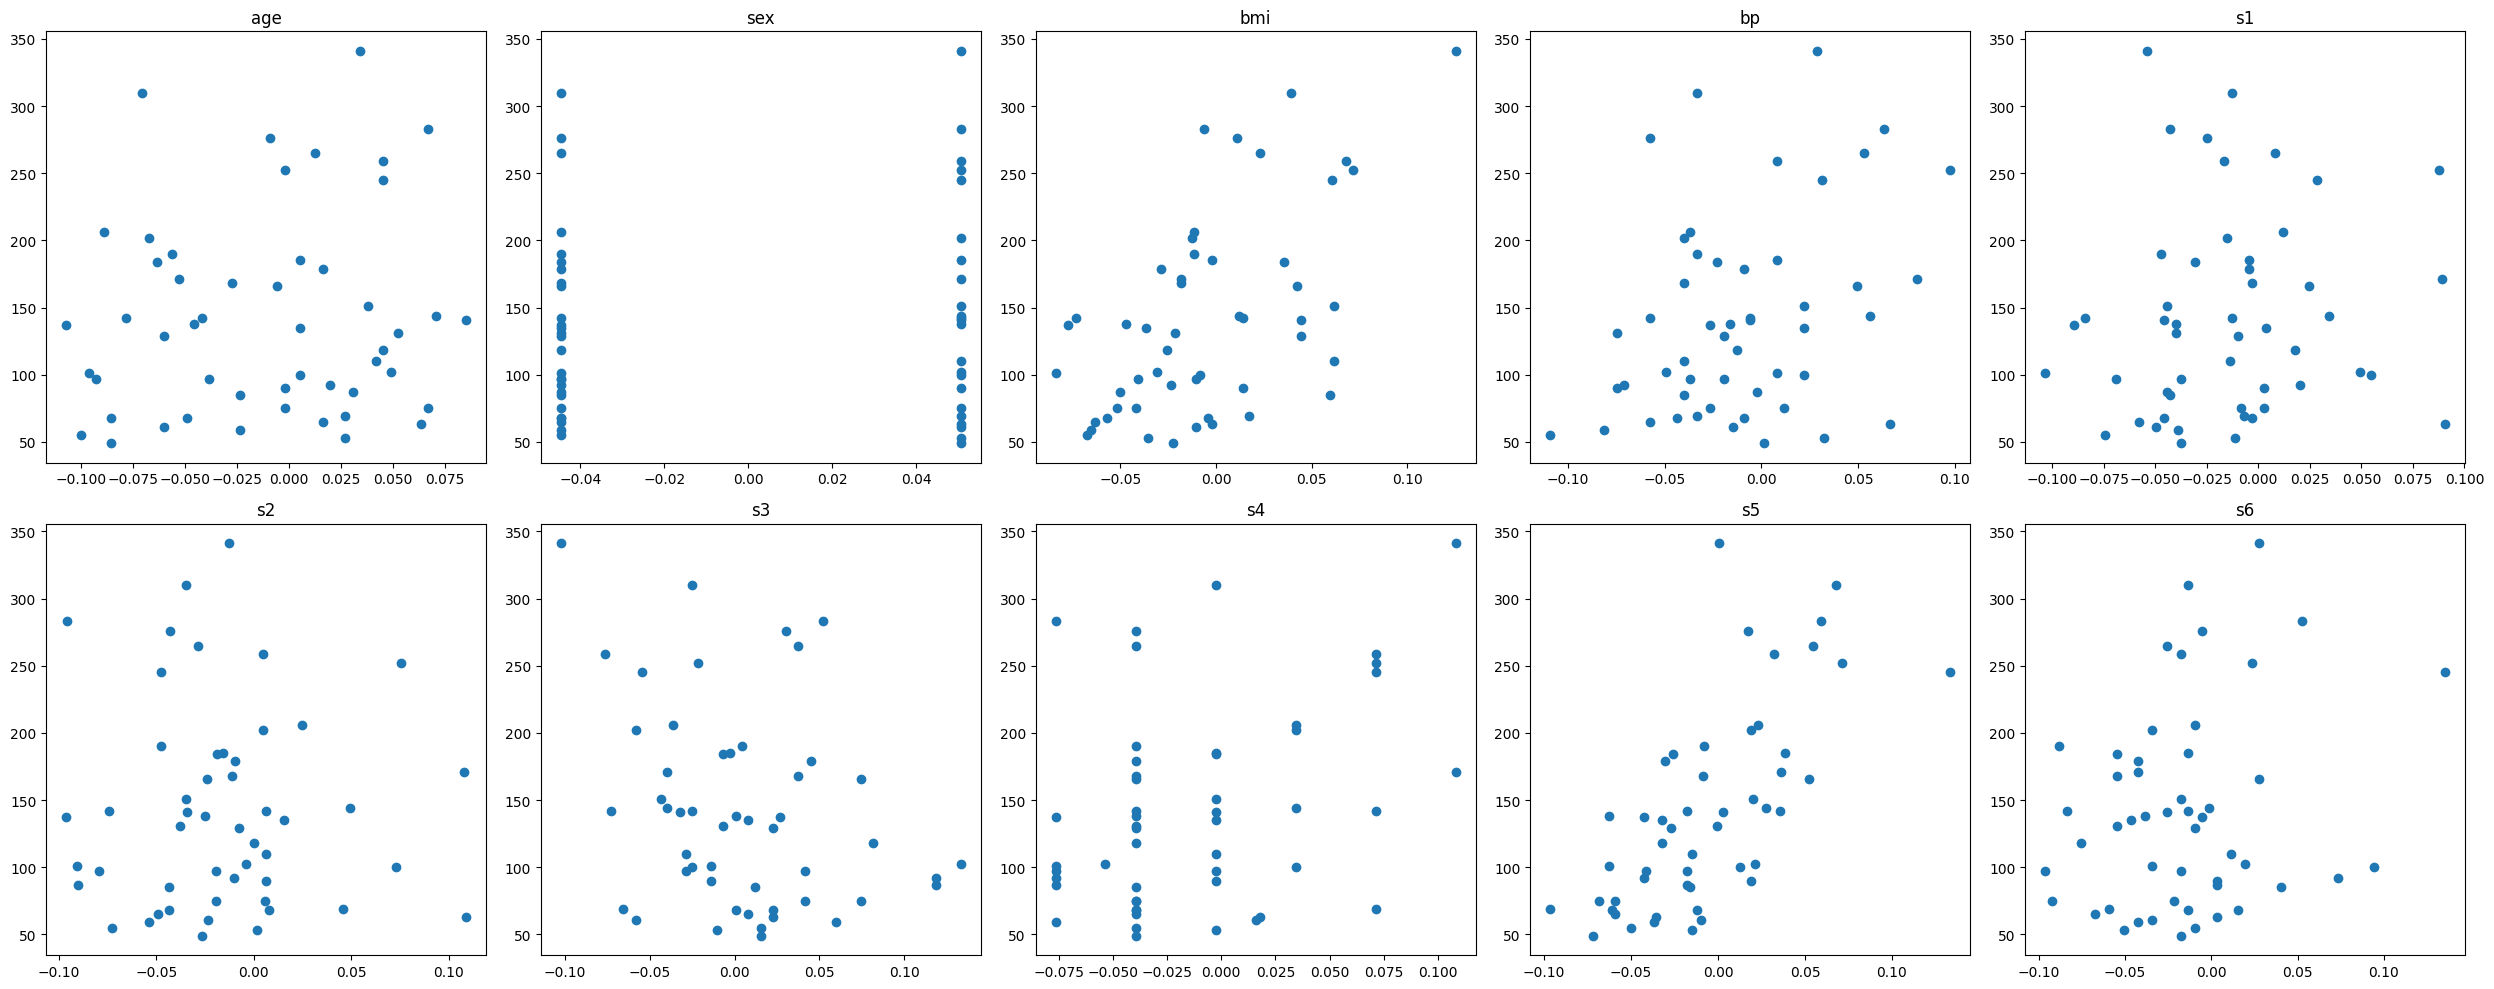

In [7]:
# Revisa la relación de cada variable con la variable Y
filas = 2
col = 5

nombres_col = diabetes.feature_names

# N es la cantidad de datos con los que se trabajará.
N = 50
fig, axs = plt.subplots(filas, col,figsize=(25,10))

n = 0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].set_title(nombres_col[n])
        axs[i,j].scatter(data_x[nombres_col[n]][:N],data_y[:N])
        n = n+1

fig.tight_layout()

##Aplica Regresión polinomial

Se recomienda que revise las funciones: PolynomialFeatures, np.polyval y np.flip. Le puede servir para entender mejor que hace el código a continuación.

In [8]:
# Ojo con include_bias: por default es True y genera una columna con todos 1 (= x^0)
# Si se deja esto en True, es conveniente pedirle luego al modelo lineal que no ajuste la ordenada al origen para evitar confusiones
grado_polinomio = 7
polyfeats = PolynomialFeatures(degree = grado_polinomio, include_bias = True)

In [9]:
# Define con cual variable se trabajará. LA MISMA PARA COMPARAR
variable = 'bmi'
X = np.array(data_x[variable][:N]).reshape(-1,1)

In [11]:
X_poly = polyfeats.fit_transform(X)

# Ver que se tienen columas x^0, x^1, x^2, x^3, x^4, x^5, ....etc
#print(X_poly)

Esta última variable tiene toda la información de x "y" sus potencias a incluir en el ajuste. Lo que queda es hacer una regresión múltiple de y con respecto a esta matriz de potencias de x.

In [13]:
## Creación y ajuste del modelo

# Creación del modelo lineal, idéntico al caso de una sola variable
# Al poner fit_intercept = False, todos los coeficientes del modelo están en el atributo ".coef_"
# Esto último es deseable si antes fue usado PolynomialFeatures(include_bias = True)
reg_poly = LinearRegression(fit_intercept = False)

# Ajuste del modelo con los términos polinómicos
reg_poly.fit(X_poly, data_y[:N])

# Coeficientes del modelo, el orden corresponde a las columnas de X_poly
print('Coeficientes = {}'.format(reg_poly.coef_[0]))

Coeficientes = [ 1.59263615e+02  1.48374740e+03 -2.27862590e+04 -6.46758694e+05
  3.17789605e+06  1.62835276e+08  2.44533594e+08 -1.05861418e+10]


In [16]:
l_ordenada = list(data_x[variable][:N])
l_ordenada.sort() # se ordena para dibujar bien la curva
#l_ordenada

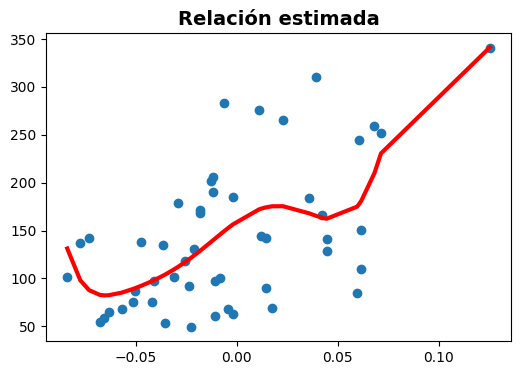

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
plt.scatter(X, data_y[:N])

# Relacion estimada
# (usamos np.flip que invierte el orden de los coeficientes, ya que polyval los toma en orden diferente a lo que devuelve reg.coef_)
y_estimado = np.polyval(np.flip(reg_poly.coef_[0]), l_ordenada)

ax.plot(l_ordenada, y_estimado, color = 'red', linewidth = 3)

plt.title("Relación estimada", fontsize=14, fontweight="bold")
plt.show()

In [19]:
# Calidad del ajuste
print('Calidad de ajuste R^2 = {:.3f}'.format(reg_poly.score(X_poly, data_y[:N])))

Calidad de ajuste R^2 = 0.386


In [20]:
# mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(data_y[:N], y_estimado))

Mean squared error: 7330.75


In [21]:
# mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(data_y[:N], y_estimado))

Mean absolute error: 70.86


##Predecir valores nuevos

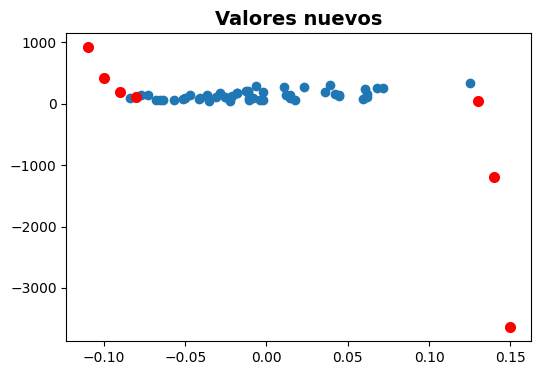

In [23]:
# Graficar los puntos azules
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
plt.scatter(X, data_y[:N])

valores_nuevos = np.array([-0.11,-0.10, -0.09,-0.08, 0.13, 0.14, 0.15])
X_nuevo = valores_nuevos.reshape(-1, 1)

# Realiza la predicción
y_estimado = np.polyval(np.flip(reg_poly.coef_[0]), X_nuevo)

plt.scatter(X_nuevo, y_estimado, color = 'red', linewidth = 2)
plt.title("Valores nuevos", fontsize=14, fontweight="bold")
plt.show()


## Desafío

+ Recomendamos cambiar la variable a estudiar.

+ Cambiar el grado del polinomio. Vea como cambia la curva y las métricas de rendimiento.